# Chapter 08 이미지를 위한 인공 신경망

## 08-3 합성곱 신경망의 시각화

### 가중치 시각화

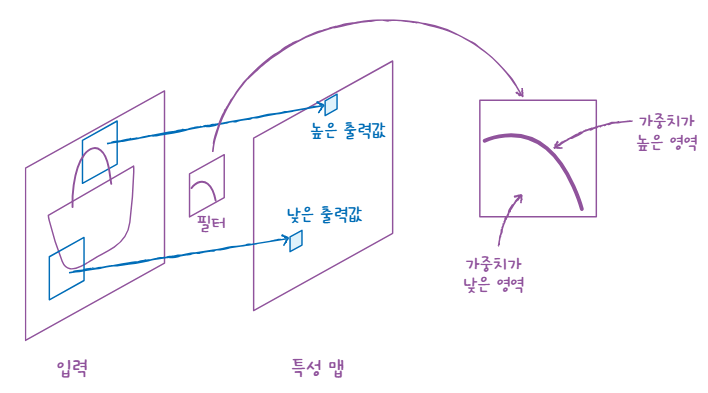

In [24]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [25]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [26]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [27]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.008513641 0.21921493


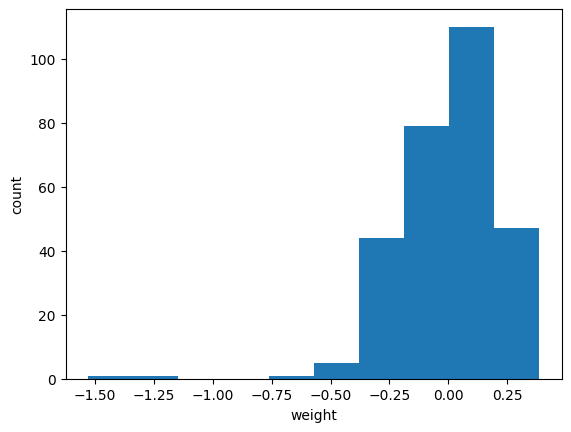

In [28]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

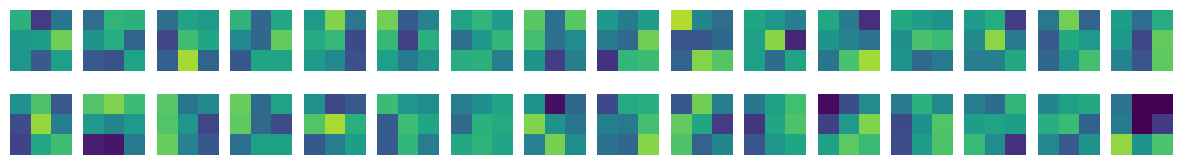

In [29]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [30]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                      'relu', padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [32]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.009174108 0.085438766


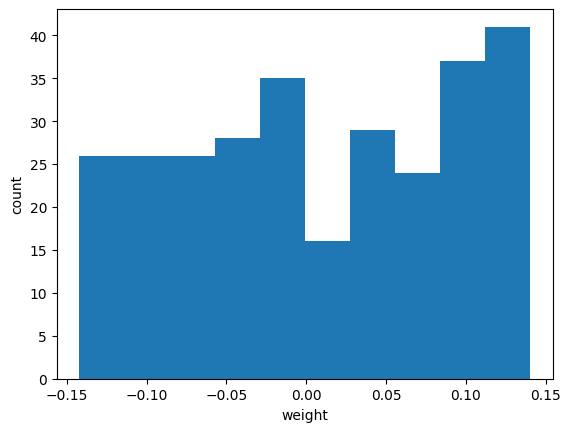

In [33]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

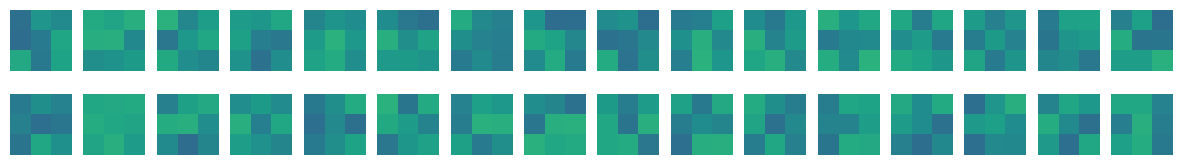

In [34]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5,
                     vmax=0.5)
    axs[i, j].axis('off')
plt.show()

### 함수형 API

In [35]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
hidden = dense1(inputs)

In [ ]:
outputs = dense2(hidden)

In [ ]:
model = keras.Model(inputs, outputs)

In [ ]:
inputs = keras.Input(shape=(784,))

In [ ]:
print(model.inputs)

In [39]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

**케라스 함수형 API 요약 정리**

| 구분 | 설명 | 예시 코드 |
|------|------|-----------|
| **입력 정의** | 입력 데이터의 형태(shape)를 지정 | `inputs = keras.Input(shape=(784,))` |
| **층 정의** | 사용할 층(레이어)을 정의 | `dense1 = keras.layers.Dense(100, activation='relu')` |
| **층 연결** | 앞선 층의 출력을 다음 층에 입력 | `hidden = dense1(inputs)` |
| **출력 정의** | 마지막 층을 거쳐 나온 출력값 | `outputs = dense2(hidden)` |
| **모델 생성** | 입력과 출력을 연결해 모델 구성 | `model = keras.Model(inputs, outputs)` |
| **중간 출력 모델** | 특정 층까지만 출력 모델 구성 | `conv_model = keras.Model(model.input, model.layers[0].output)` |
| **모델 입출력 확인** | 모델의 입력 또는 특정 층 출력 확인 | `print(model.input)`<br>`print(model.layers[0].output)` |

---

**전체 구조 예시**

```python
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

hidden = dense1(inputs)
outputs = dense2(hidden)

model = keras.Model(inputs, outputs)
```

### 특성 맵 시각화

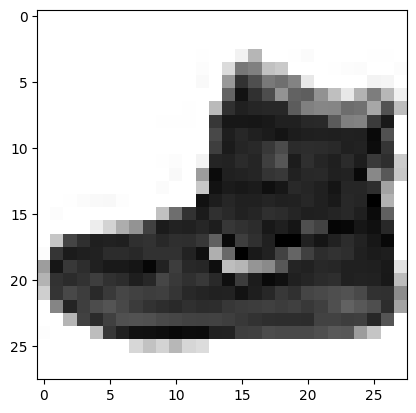

In [37]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [40]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [41]:
print(feature_maps.shape)

(1, 28, 28, 32)


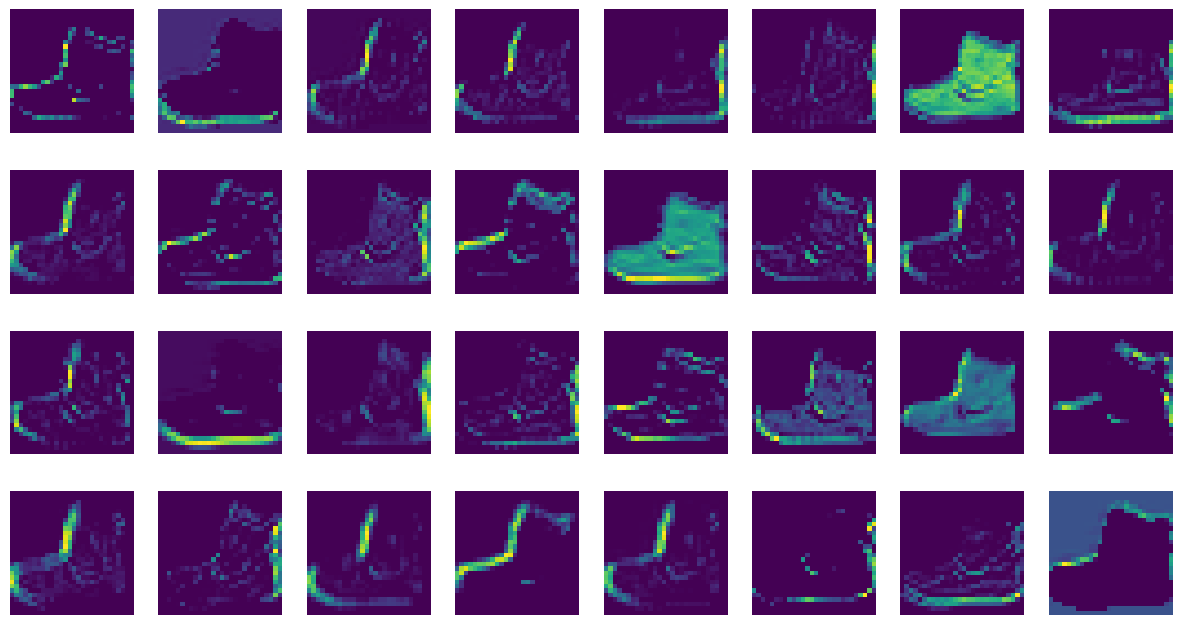

In [44]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [45]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [46]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [47]:
print(feature_maps.shape)

(1, 14, 14, 64)


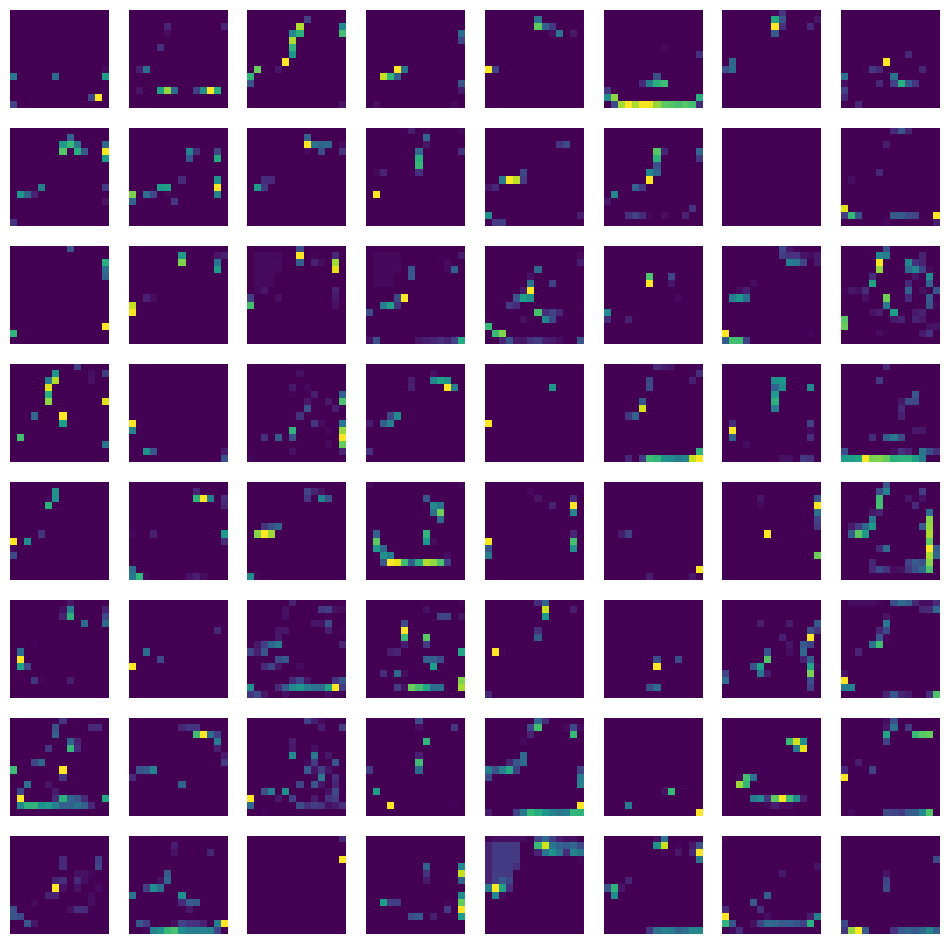

In [48]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

# Chapter 09 텍스트를 위한 인공 신경망

## 09-1 순차 데이터와 순환 신경망

### 순차 데이터

**순차 데이터**<br>
텍스트나 시계열 데이터 같이 순서에 의미가 있는 데이터

**피드포워드 신경망**<br>
입력 데이터의 흐름이 앞으로만 전달되는 신경망

### 순환 신경망

**순환 신경망**<br>
순차적 데이터 또는 시계열 데이터로 훈련된 심층 신경망

**타임스텝**<br>
시퀀스에서 입력이 한 번 처리되는 단위

**셀**<br>
순환 신경망에서 시퀀스의 각 단계를 처리하는 기본 구조

**은닉 상태**<br>
셀에서 출력되는 현재까지의 정보를 담은 상태 벡터

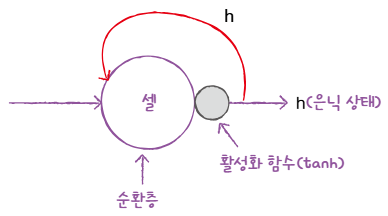

**tanh 함수**<br>
입력을 -1과 1 사이로 변환하는 비선형 활성화 함수


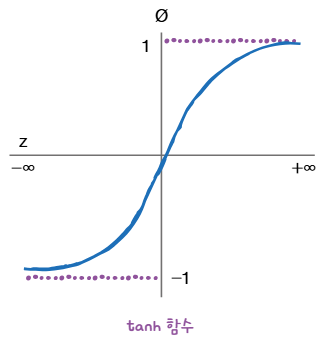

**은닉층에서는 `tanh` 더 선호**   
→ 출력이 0 중심이어서 학습이 더 빠르고 안정적

**출력층에서는 `sigmoid`**   
→ 이진 분류처럼 확률값(0~1)을 표현할 때 사용

### 셀의 가중치와 입출력

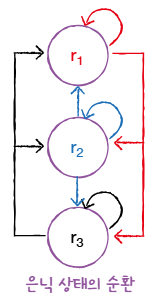

**순환 신경망(RNN)이란?**

사람은 문장을 순서대로 읽고 기억하면서 이해합니다.  
예를 들어, “나는 학교에 갔다”는 문장은 앞에서부터 순서대로 읽어야 이해가 되죠.  
**RNN은 컴퓨터가 이런 ‘순서’를 이해할 수 있도록 만든 신경망**입니다.

---

**RNN은 어떻게 작동할까?**

**한 번에 한 단어씩**<br>
문장을 읽을 때, 단어 하나씩 순서대로 넣습니다.  
그리고 **이전 단어를 기억**하면서 다음 단어를 처리합니다.  
이 과정을 **타임스텝(Time Step)**이라고 부릅니다.

- 예시:  
  `"I am a boy"` → 4개의 타임스텝  
  → 하나씩 RNN에 순서대로 입력됨

---

**셀(Cell)이란?**

RNN의 기본 단위로,  
각 타임스텝에서 **현재 입력 + 이전 기억(은닉 상태)**을 받아 새로운 출력을 만듭니다.  
출력은 다음 셀로 **기억처럼 전달**됩니다.

---

**은닉 상태(Hidden State)란?**

‘은닉 상태’는 지금까지 읽은 내용을 요약한 **기억**입니다.  
이 기억은 다음 단어를 이해하는 데 도움이 됩니다.

> "I am"을 읽고 있다면,  
> “a”를 읽을 때 “앞에 ‘am’이 있었지” 하고 기억하는 것처럼요.

---

**은닉 상태는 어떻게 전달될까?**

- 첫 번째 셀이 만든 은닉 상태는  
  → 두 번째 셀, 세 번째 셀 등 **모든 다음 셀에 전달**됩니다.
- 그래서 RNN은 **모든 셀이 서로 연결된 구조**처럼 작동합니다.

---

**파라미터 개수는 어떻게 계산할까?**

RNN에는 다음 3가지 종류의 파라미터가 있습니다:

1. **입력 가중치 (Wₓ)**: 단어 벡터 → 은닉 상태  
2. **은닉 가중치 (Wₕ)**: 이전 은닉 상태 → 현재 은닉 상태  
3. **편향 (b)**

예시:
- 단어 벡터 크기: 4  
- 은닉 뉴런 수: 3  
- 파라미터 수 = `4×3(입력) + 3×3(은닉) + 3(편향)`  
→ **총 24개**

---

**입력 데이터는 어떤 모양일까?**

RNN은 **3차원 형태의 입력**을 받습니다:   
(샘플 수, 시퀀스 길이, 단어 벡터 크기)

예시:
- 2개의 문장  
- 각 문장: 4단어  
- 각 단어: 3개의 숫자로 표현  
→ 입력 형태: `(2, 4, 3)`

---

**출력은 어떻게 나올까?**

출력 방식에는 두 가지가 있습니다:

1. **모든 타임스텝의 결과 사용**  
   - 모든 은닉 상태 출력 → 예: 번역, 음성 인식  
2. **마지막 타임스텝만 사용**  
   - 마지막 은닉 상태만 출력 → 예: 감정 분류

---

**분류 문제에서는?**

- 마지막 은닉 상태를 **출력층(Dense)에 연결**  
- **Softmax 함수**를 써서 각 클래스의 확률 계산

예시:
- 3개의 감정 클래스를 예측  
→ 출력 뉴런 3개 + softmax 함수

---

**예시로 정리**

> 문장: `"I am a boy"`  
> 각 단어를 숫자 벡터로 표현  
> RNN에 순서대로 입력 → 마지막 셀의 은닉 상태 출력  
> → 감정 분류 모델로 전달

---

**전체 흐름 요약**

1. 문장을 단어별로 나눠서 순서대로 입력  
2. 각 셀은 이전 은닉 상태를 기억하고 다음 출력을 계산  
3. 마지막 셀에서 최종 은닉 상태를 출력  
4. 그 출력을 분류기로 연결해 예측 결과 도출

